# PréTraitement: Load Data

In [164]:
# Dataset used=> Kaggle : https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset

# Goal : see the different laptops features in the market in order to identify the best ones : recommandation , see is there a relationship between those features and the price of the laptop 

Initial Columns in this dataset : 
 0   Laptop :  The unique identifier or model name of the laptop.
 1   Status : the laptop's state            
 2   Brand: Laptop brand.
 3   Model: Laptop brand model.           
 4   CPU (Central Processing Unit): The processor brand, model, and other relevant details.                
 5   RAM (Random Access Memory): The amount of memory available for multitasking.                 
 6   Storage           
 7   Storage type      
 8   GPU (Graphics Processing Unit): The graphics card brand, model, and associated specifications.                
 9   Screen Size         
 10  Touch screen
 11  Price      

In [165]:
# Importez pandas, numpy, pyplot de matplotlib et seaborn
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
custom_palette = sns.color_palette("Paired")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

In [166]:
#Lecture du fichier CSV
data = pd.read_csv(r"C:\DM Project\laptopsdata.csv")

In [167]:
#Mettre le fichier dans un DataFrame
laptop = pd.DataFrame(data)

In [168]:
laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [169]:
laptop.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [170]:
laptop.shape

(2160, 12)

In [171]:
laptop.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [172]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [173]:
#type de chaque colonne
print(laptop.dtypes)

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object


In [174]:
#Renaming some Columns for more clarity
laptop= laptop.rename(columns={"Touch": "Touch screen","Screen": "Screen Size","Final Price":"Price","Laptop": "Laptop's full Name"})
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


# How many NaN values do we have 

In [175]:
# get the number of missing data points per column
missing_values_count = laptop.isnull().sum()
print(missing_values_count)

Laptop's full Name       0
Status                   0
Brand                    0
Model                    0
CPU                      0
RAM                      0
Storage                  0
Storage type            42
GPU                   1371
Screen Size              4
Touch screen             0
Price                    0
dtype: int64


In [176]:
# how many total missing values 
total_cells = np.product(laptop.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing_values = (total_missing/total_cells) * 100
print(percent_missing_values)

5.466820987654321


In [177]:
#To make sure there is no duplicates in the dataset ( redundacy)
laptop.drop_duplicates(inplace=True)

laptop.info()
laptop.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2118 non-null   object 
 8   GPU                 789 non-null    object 
 9   Screen Size         2156 non-null   float64
 10  Touch screen        2160 non-null   object 
 11  Price               2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 219.4+ KB


(2160, 12)

In [178]:
missing_values_count1 = laptop['GPU'].isnull().sum()
# how many total missing values in the GPU column do we have?
total_cells1 = np.product(laptop.shape)
total_missing1 = missing_values_count1.sum()

# percent of GPU data that is missing
percent_gpu_values = (total_missing1/total_cells1) * 100
print(percent_gpu_values)

5.289351851851852


In [179]:
# dealing with the missing data 'Missing' instead of NaN
columns_to_fill = ['CPU']
laptop[columns_to_fill] = laptop[columns_to_fill].fillna('Missing')
laptop['Screen Size'] = laptop['Screen Size'].fillna(0)
laptop['Storage type'] = laptop['Storage type'].fillna('NotMentioned')
laptop['GPU'] = laptop['GPU'].fillna('NotMentioned')
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,No,669.01


In [180]:
#delete lignes that have a null Model : the main caracteristic
laptop=laptop.dropna(subset=['Model'])
laptop.shape
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2160 non-null   object 
 8   GPU                 2160 non-null   object 
 9   Screen Size         2160 non-null   float64
 10  Touch screen        2160 non-null   object 
 11  Price               2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 219.4+ KB


In [181]:
# Using the dictionary to map the 'Touch Screen' values to 0 and 1 instead of yes or no 
Yes_vs_No = {'Yes': 1, 'No': 0} 
laptop['Touch screen'] =laptop['Touch screen'].map(Yes_vs_No)
laptop['Touch screen'] =laptop['Touch screen'].astype('int64')
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01


# Traitement des Colonnes 

1) column "Model" :

In [182]:
#to determine unique values in the "Model" Column without the NaN values
processor_models = laptop['Model'].value_counts(dropna=True)
processor_models

15S            115
IdeaPad        104
ROG            101
ThinkPad        99
VivoBook        99
              ... 
100w             1
Electronics      1
Cyborg           1
14S              1
GL75             1
Name: Model, Length: 121, dtype: int64

2) Column "Brand" : 

In [183]:
#to determine unique values in the "Brand" Column even the NaN values
laptop['Brand'].value_counts(dropna=False)

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64

In [184]:
#to determine unique values in the "Brand" Column without the NaN values
laptop['Brand'].value_counts(dropna=True)

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64

2) Column "CPU" : Processor

In [185]:
#to determine unique values in the "CPU" Column even the NaN values
laptop['CPU'].value_counts(dropna=False)

Intel Core i7            710
Intel Core i5            535
AMD Ryzen 7              156
Intel Core i3            130
AMD Ryzen 5              127
Intel Core i9             94
Intel Celeron             94
Intel Evo Core i7         82
AMD Ryzen 9               44
AMD Ryzen 3               44
Intel Evo Core i5         30
Apple M2                  28
AMD 3020e                 13
Apple M2 Pro              13
Apple M1                  11
AMD Athlon                10
Intel Pentium             10
Apple M1 Pro               7
Intel Core M3              5
AMD 3015e                  3
Microsoft SQ1              3
Qualcomm Snapdragon 7      3
AMD Radeon 9               2
Qualcomm Snapdragon 8      2
Intel Evo Core i9          1
Mediatek MT8183            1
AMD 3015Ce                 1
AMD Radeon 5               1
Name: CPU, dtype: int64

In [186]:
#Creating a new column "CPU brand" from the column "CPU" : to explore CPU Brands in the market
laptop['CPU Brand '] = laptop['CPU'].str.split().str[0]
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel


In [187]:
#to see the different CPU Brands
laptop['CPU Brand '].value_counts(dropna=False)

Intel        1691
AMD           401
Apple          59
Qualcomm        5
Microsoft       3
Mediatek        1
Name: CPU Brand , dtype: int64

In [188]:
# to extract the processor tier : processor version within each CPU 
processor_split = laptop['CPU'].str.split()
#+ adding a new Column "Processor tier"

# Extract the second and third words if available, otherwise concatenate the available words
laptop['Processor tier'] = processor_split.apply(lambda x: x[1] + ' ' + x[2] if len(x) > 2 else x[1])
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel,Core i5
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel,Celeron
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel,Core i3
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel,Core i7
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel,Core i5


In [189]:
#to see the different "Processor tiers"
laptop['Processor tier'].value_counts(dropna=False)

Core i7         710
Core i5         535
Ryzen 7         156
Core i3         130
Ryzen 5         127
Evo Core        113
Celeron          94
Core i9          94
Ryzen 9          44
Ryzen 3          44
M2               28
3020e            13
M2 Pro           13
M1               11
Athlon           10
Pentium          10
M1 Pro            7
Core M3           5
Snapdragon 7      3
3015e             3
SQ1               3
Radeon 9          2
Snapdragon 8      2
Radeon 5          1
MT8183            1
3015Ce            1
Name: Processor tier, dtype: int64

3) Column "GPU" : Graphic Card

In [120]:
#to determine unique values in the "GPU" Column even the NaN values
laptop['GPU'].value_counts(dropna=False)

NotMentioned          1371
RTX 3050               129
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
MX 450                   7
RTX A3000                7
RTX 2080                 7
RTX A1000                6
T 1200                   6
T 500                    5
MX 330                   5
MX 550                   5
T 550                    4
RX 6500M                 3
RTX A5500                3
GTX 1050                 3
Radeon Pro RX 560X       3
Radeon Pro 5300M         2
T 600                    2
RX 7600S                 2
610 M                    2
P 500                    1
RX 6700M                 1
MX 130                   1
A

In [121]:
#to determine unique values in the "GPU" Column without the NaN values
laptop['GPU'].value_counts(dropna=True)

NotMentioned          1371
RTX 3050               129
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
MX 450                   7
RTX A3000                7
RTX 2080                 7
RTX A1000                6
T 1200                   6
T 500                    5
MX 330                   5
MX 550                   5
T 550                    4
RX 6500M                 3
RTX A5500                3
GTX 1050                 3
Radeon Pro RX 560X       3
Radeon Pro 5300M         2
T 600                    2
RX 7600S                 2
610 M                    2
P 500                    1
RX 6700M                 1
MX 130                   1
A

In [122]:
# searching for different GPU brands: 
GPU_Brands = laptop['GPU'].str.split().str[0].dropna().unique()
GPU_Brands

array(['NotMentioned', 'RTX', 'GTX', '610', 'RX', 'MX', 'A', 'T',
       'Radeon', 'P'], dtype=object)

In [123]:
# adding a new Column "GPU Brand" to see the different GPU Brands in the market
laptop['GPU Brand'] = laptop['GPU'].str.split().str[0]
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel,Core i5,NotMentioned
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel,Celeron,NotMentioned
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel,Core i3,NotMentioned
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel,Core i7,RTX
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel,Core i5,NotMentioned


In [124]:
#to determine unique values in the "GPU Brand" Column 
laptop['GPU Brand'].value_counts(dropna=True)

NotMentioned    1371
RTX              657
GTX               68
T                 19
MX                18
Radeon            15
RX                 7
610                2
A                  2
P                  1
Name: GPU Brand, dtype: int64

def add_new_column(df, column1, new_column_name):
    df[new_column_name] = df[column1[1]].astype(str) + "" + df[column1[2]].astype(str)
    return df
add_new_column(laptop, laptop['CPU'], 'Processor tier')
laptop.head()

4) column "RAM" : Random Access Memory

In [125]:
#to determine unique values in the "GPU" Column with the NaN values
laptop['RAM'].value_counts(dropna=False)

16     928
8      817
32     301
4       68
64      25
12      15
6        3
40       2
128      1
Name: RAM, dtype: int64

5) column "Screen Size" : to see different screen sizes possible

In [126]:
#to determine unique values in the "Screen Size" Column with the NaN values
laptop['Screen Size'].value_counts(dropna=False)

15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.40      19
13.50      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
0.00        4
12.00       4
14.50       3
18.00       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: Screen Size, dtype: int64

6) Column "Storage" : storage Capacity

In [33]:
#to determine unique values in the "Storage" Column without the NaN values
laptop['Storage'].value_counts(dropna=True)

512     941
1000    570
256     450
128      67
2000     42
500      37
64       35
32       14
0         1
4000      1
3000      1
240       1
Name: Storage, dtype: int64

7) Column "Storage type"

In [34]:
#to determine unique values in the "Storage type" Column with the NaN values
laptop['Storage type'].value_counts(dropna=False)

SSD             2062
eMMC              56
NotMentioned      42
Name: Storage type, dtype: int64

8) Column "Touch screen" : screen additional functionality

In [36]:
#to determine unique values in the "Touch screen" Column with the NaN values
laptop['Touch screen'].value_counts(dropna=False)

0    1933
1     227
Name: Touch screen, dtype: int64

10) Column Status

In [37]:
#to determine unique values in the "Storage type" Column with the NaN values
laptop["Status"].value_counts(dropna=False)

New            1498
Refurbished     662
Name: Status, dtype: int64

11) Column "Price"

In [128]:
# searching for the price in TND , adding a new column
def INR_to_TND(df, column_1, new_column):
   df[new_column] = df[column_1].astype('float64') * 3.14
   return df

laptop = INR_to_TND(laptop,'Price','Price_in_TND')
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel,Core i5,NotMentioned,3168.2600
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel,Celeron,NotMentioned,938.8600
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel,Core i3,NotMentioned,2477.4600
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel,Core i7,RTX,3764.8600
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel,Core i5,NotMentioned,2100.6914


In [129]:
# arrange the rows by Price descending
sorted_laptop = laptop.sort_values(by='Price_in_TND', ascending=False)
sorted_laptop

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,0,7150.47,Intel,Core i9,RTX,22452.4758
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,0,5999.00,Intel,Core i9,RTX,18836.8600
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,0,5758.14,Intel,Core i9,RTX,18080.5596
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,0,5630.90,AMD,Radeon 9,RTX,17681.0260
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,0,5368.77,Intel,Core i7,RTX,16857.9378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NotMentioned,NotMentioned,11.6,0,230.14,Intel,Celeron,NotMentioned,722.6396
554,Primux Ioxbook 15CA Intel Celeron N4000/8GB/25...,New,Primux,Ioxbook,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,229.00,Intel,Celeron,NotMentioned,719.0600
638,HP EliteBook 840 G3 Intel Core i5-6200U/8GB/25...,Refurbished,HP,EliteBook,Intel Core i5,8,256,SSD,NotMentioned,14.0,0,210.14,Intel,Core i5,NotMentioned,659.8396
505,Primux ioxbook 1406F Intel Celeron N4000/4 GB/...,New,Primux,Ioxbook,Intel Celeron,4,128,SSD,NotMentioned,14.0,0,208.99,Intel,Celeron,NotMentioned,656.2286


In [130]:
#to determine unique values in the "Price_in_TND" Column without the NaN values
laptop['Price_in_TND'].value_counts(dropna=True)

3136.8600    27
6276.8600    25
2194.8600    23
2508.8600    23
5020.8600    21
             ..
4318.4420     1
1241.5560     1
2926.9510     1
4191.9314     1
5337.9686     1
Name: Price_in_TND, Length: 1440, dtype: int64

In [131]:
# searching for the min + max + mean + median price
print('max : ' + str(laptop['Price_in_TND'].max()))
print('min : ' + str(laptop['Price_in_TND'].min()))
print('mean : ' + str(laptop['Price_in_TND'].mean()))
print('median : ' + str(laptop['Price_in_TND'].median()))

max : 22452.4758
min : 631.297
mean : 4121.684919074079
median : 3240.3073000000004


In [133]:
laptop.shape

(2160, 16)

In [134]:
laptop.describe()

,RAM,Storage,Screen Size,Touch screen,Price,Price_in_TND
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,15.413889,596.294444,15.140023,0.105093,1312.638509,4121.684919
std,9.867815,361.220506,1.367766,0.306744,911.475417,2862.032809
min,4.000000,0.000000,0.000000,0.000000,201.050000,631.297000
25%,8.000000,256.000000,14.000000,0.000000,661.082500,2075.799050
50%,16.000000,512.000000,15.600000,0.000000,1031.945000,3240.307300
75%,16.000000,1000.000000,15.600000,0.000000,1708.970000,5366.165800
max,128.000000,4000.000000,18.000000,1.000000,7150.470000,22452.475800


In [136]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2160 non-null   object 
 8   GPU                 2160 non-null   object 
 9   Screen Size         2160 non-null   float64
 10  Touch screen        2160 non-null   int64  
 11  Price               2160 non-null   float64
 12  CPU Brand           2160 non-null   object 
 13  Processor tier      2160 non-null   object 
 14  GPU Brand           2160 non-null   object 
 15  Price_in_TND        2160 non-null   float64
dtypes: flo

In [137]:
# Importation du module stats

from scipy import stats

# IQR de la variable 'total_bill'
laptop.describe(include = 'all' )

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2160,2160,2160.000000,2160.000000,2160.000000,2160,2160,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,3,45,NaN,NaN,NaN,6,26,10,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,NotMentioned,NaN,NaN,NaN,Intel,Core i7,NotMentioned,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,1371,NaN,NaN,NaN,1691,710,1371,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.140023,0.105093,1312.638509,NaN,NaN,NaN,4121.684919
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.367766,0.306744,911.475417,NaN,NaN,NaN,2862.032809
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,0.000000,0.000000,201.050000,NaN,NaN,NaN,631.297000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,0.000000,661.082500,NaN,NaN,NaN,2075.799050
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,0.000000,1031.945000,NaN,NaN,NaN,3240.307300
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,0.000000,1708.970000,NaN,NaN,NaN,5366.165800


# Visualisations:

# we will be using "Barplots" to display the distribution of categorical variables or to compare them.

This bar chart shows the distribution of laptops among different brands. Brand "Asus" appears to have the highest number of laptops, followed by Brand "HP" and Brand "Lenovo".

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64


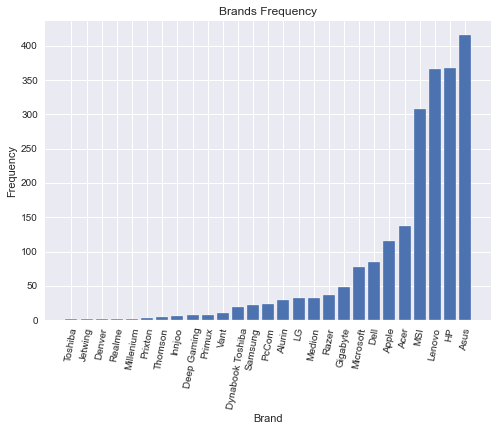

In [138]:
# to show the frequency table of the "Brand"
Brand_count = laptop['Brand'].value_counts()
print(Brand_count)
# BarPlot:
sorted_frequency_table = Brand_count.sort_values()
plt.bar(sorted_frequency_table.index, sorted_frequency_table)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Brands Frequency')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.show()

This Histogram shows the distribution of laptops among different Processor brands. Brand "intel" appears to have the highest number of laptops, followed by Brand "AMD" and Brand "Apple".

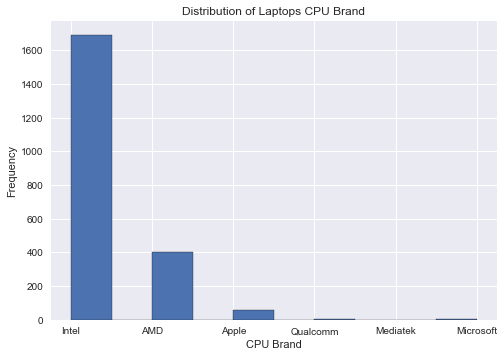

In [139]:
plt.hist(laptop['CPU Brand '], bins=10, edgecolor='black')
plt.xlabel('CPU Brand')
plt.ylabel('Frequency')
plt.title('Distribution of Laptops CPU Brand')
plt.show()

This bar chart shows the distribution of laptops among different CPU Models. The most common CPU models here are the "Intel Core 5 and 7" and the "AMD Ryzen 7" and 

Intel Core i7            710
Intel Core i5            535
AMD Ryzen 7              156
Intel Core i3            130
AMD Ryzen 5              127
Intel Core i9             94
Intel Celeron             94
Intel Evo Core i7         82
AMD Ryzen 9               44
AMD Ryzen 3               44
Intel Evo Core i5         30
Apple M2                  28
AMD 3020e                 13
Apple M2 Pro              13
Apple M1                  11
AMD Athlon                10
Intel Pentium             10
Apple M1 Pro               7
Intel Core M3              5
AMD 3015e                  3
Microsoft SQ1              3
Qualcomm Snapdragon 7      3
AMD Radeon 9               2
Qualcomm Snapdragon 8      2
Intel Evo Core i9          1
Mediatek MT8183            1
AMD 3015Ce                 1
AMD Radeon 5               1
Name: CPU, dtype: int64


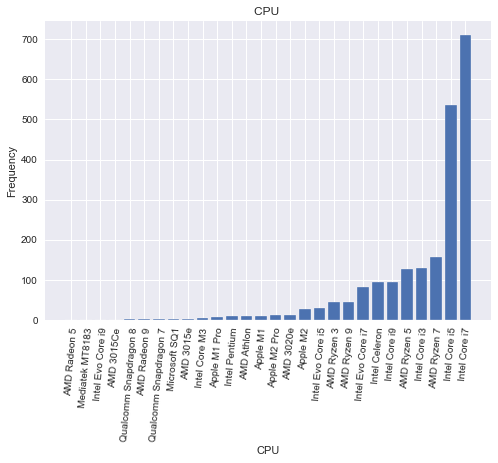

In [140]:
# to show the frequency table of the "CPU"
CPU_f = laptop['CPU'].value_counts()
print(CPU_f)
# BarPlot
sorted_frequency_table = CPU_f.sort_values()
plt.bar(sorted_frequency_table.index, sorted_frequency_table)
plt.xlabel('CPU')
plt.ylabel('Frequency')
plt.title('CPU ')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

This Histogram shows the distribution of laptops among different GPU Brands. Brand "RTX" appears to have the highest number of laptops, followed by Brand "GTX" => they Both belongs to the NVIDIA Company

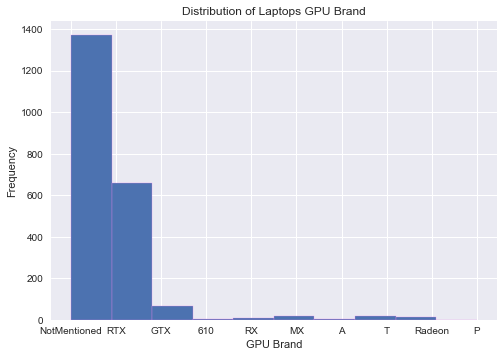

In [141]:
plt.hist(laptop['GPU Brand'], bins=10, edgecolor='violet')
plt.xlabel('GPU Brand')
plt.ylabel('Frequency')
plt.title('Distribution of Laptops GPU Brand')
plt.show()

This pie chart illustrates the proportion of laptops having a "Touch Screen" . Most laptops don't ( 89,5 %) , while a smaller portion do ( just 10.5% )  

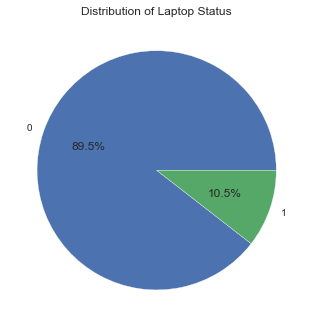

In [142]:
status_counts = laptop['Touch screen'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Laptop Status')
plt.show()

This pie chart illustrates the proportion of laptops in different statuses. Most laptops are New ( 69 %) , while a smaller portion is Refurbished ( 30.6% )  

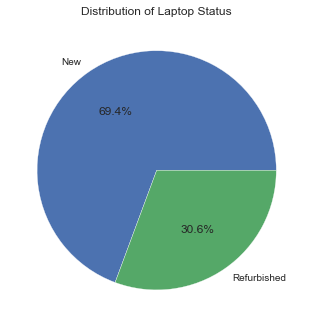

In [143]:
status_counts = laptop['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Laptop Status')
plt.show()

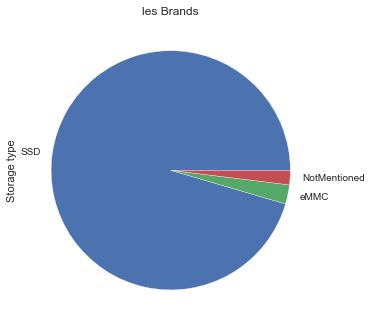

In [144]:
# Pie Chart for the "Storage" Column

laptop['Storage type'].value_counts(dropna=True).plot(
    kind = 'pie', 
    title = 'les Brands');

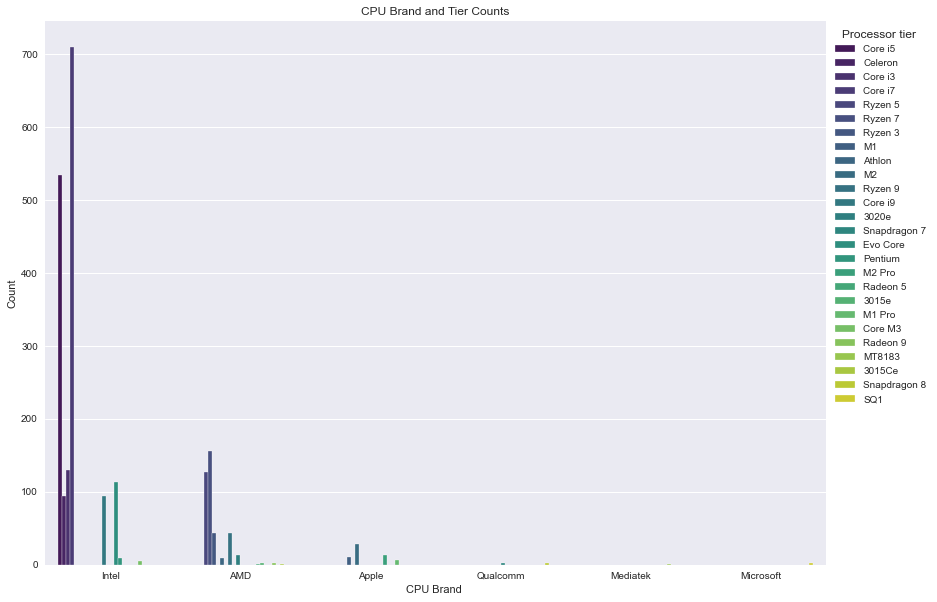

In [145]:
plt.figure(figsize=(14, 10))
sns.countplot(x='CPU Brand ', hue='Processor tier', data=laptop, palette='viridis')
plt.title('CPU Brand and Tier Counts')
plt.xlabel('CPU Brand ')
plt.ylabel('Count')
plt.legend(title='Processor tier ', bbox_to_anchor=(1, 1))
plt.show()

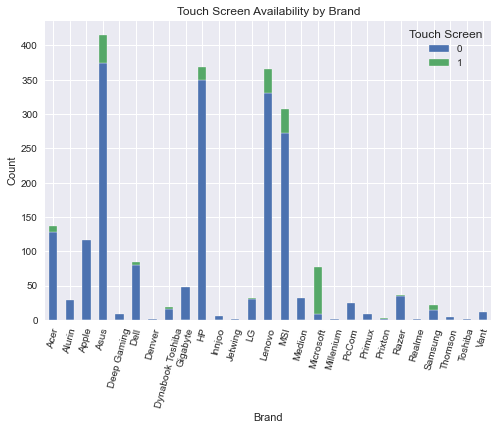

In [146]:
touchscreen_counts = laptop.groupby(['Brand', 'Touch screen']).size().unstack(fill_value=0)
touchscreen_counts.plot(kind='bar', stacked=True)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Touch Screen Availability by Brand')
plt.xticks(rotation=75)
plt.legend(title='Touch Screen')
plt.show()

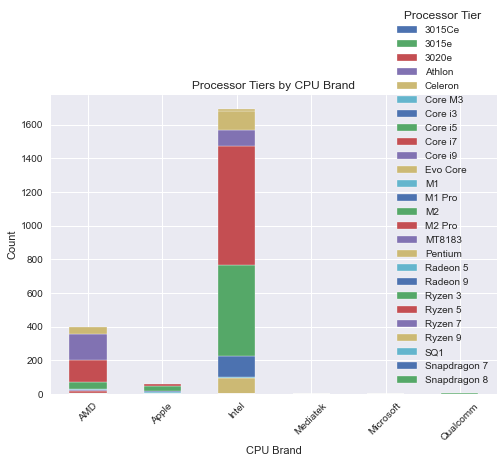

In [147]:
processor_tier_counts = laptop.groupby(['CPU Brand ', 'Processor tier']).size().unstack(fill_value=0)
processor_tier_counts.plot(kind='bar', stacked=True)
plt.xlabel('CPU Brand')
plt.ylabel('Count')
plt.title('Processor Tiers by CPU Brand')
plt.xticks(rotation=45)
plt.legend(title='Processor Tier')
plt.show()

# Features Relationship with the Laptop's Price :

In [148]:
laptop = laptop.sort_values(by='Price_in_TND', ascending=False)
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,0,7150.47,Intel,Core i9,RTX,22452.4758
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,0,5999.00,Intel,Core i9,RTX,18836.8600
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,0,5758.14,Intel,Core i9,RTX,18080.5596
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,0,5630.90,AMD,Radeon 9,RTX,17681.0260
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,0,5368.77,Intel,Core i7,RTX,16857.9378


In [74]:
brand_price =laptop.groupby('Brand')['Price_in_TND'].mean().sort_values(ascending=False)
brand_price

Brand
Razer               10254.303092
Millenium            6207.293300
MSI                  6008.236160
LG                   5432.289294
Gigabyte             5333.255329
PcCom                5045.235558
Microsoft            5010.005795
Samsung              5009.905682
Apple                4955.634891
Deep Gaming          4726.885350
Asus                 3985.855394
Dell                 3623.057226
Lenovo               3415.452983
Vant                 3289.010127
Acer                 3144.037307
Dynabook Toshiba     3137.481389
Realme               3136.860000
HP                   2991.253422
Medion               2842.742088
Toshiba              2508.860000
Alurin               1521.962331
Jetwing              1473.507800
Innjoo               1092.369367
Primux               1066.402875
Denver               1036.043000
Thomson               994.940400
Prixton               917.759200
Name: Price_in_TND, dtype: float64

# This graph represents a vision of the Price distribution based on the Brand

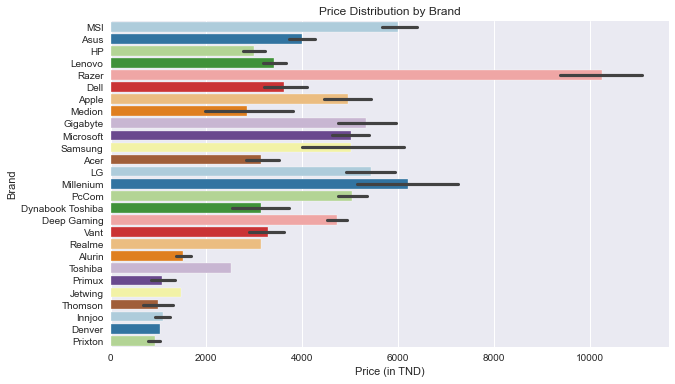

In [149]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='Brand', data=laptop, palette=custom_palette)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price Distribution by Brand')

# Show the plot
plt.show()

This graph represents a vision of the Price distribution based on the Brand of the GPU ( graphical processing Unit)

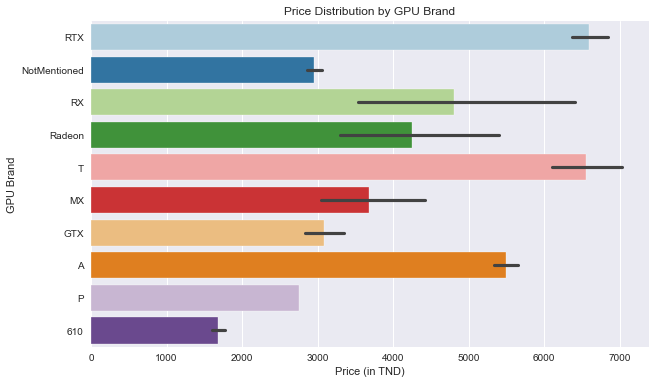

In [150]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='GPU Brand', data=laptop, palette=custom_palette)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('GPU Brand')
plt.title('Price Distribution by GPU Brand')

# Show the plot
plt.show()

This graph represents a vision of the Price distribution based on the Brand of the CPU ( central processing Unit)

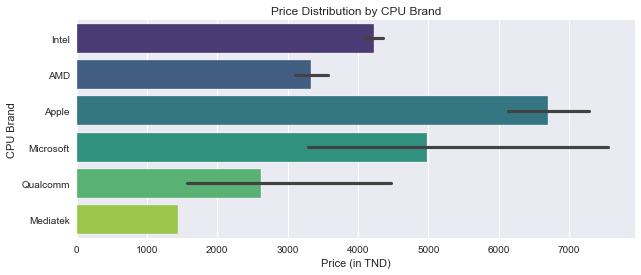

In [154]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='CPU Brand ', data=laptop, palette='viridis')

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('CPU Brand')
plt.title('Price Distribution by CPU Brand')

# Show the plot
plt.show()

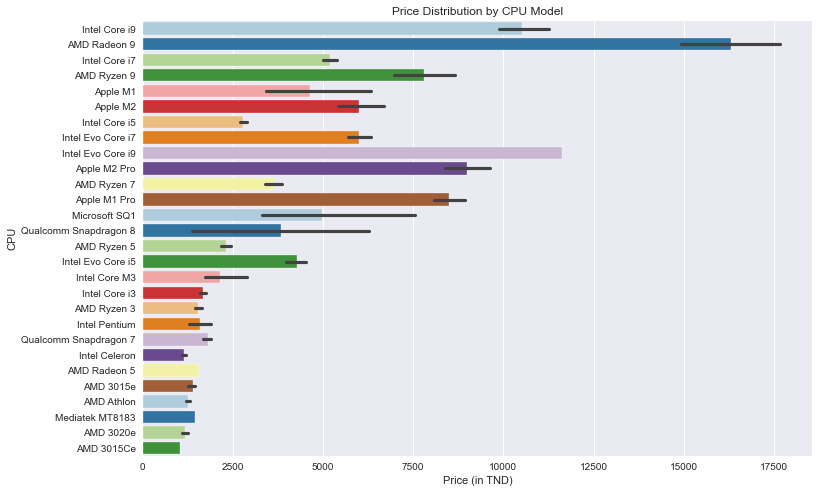

In [155]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='CPU', data=laptop, palette=custom_palette)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('CPU')
plt.title('Price Distribution by CPU Model')

# Show the plot
plt.show()

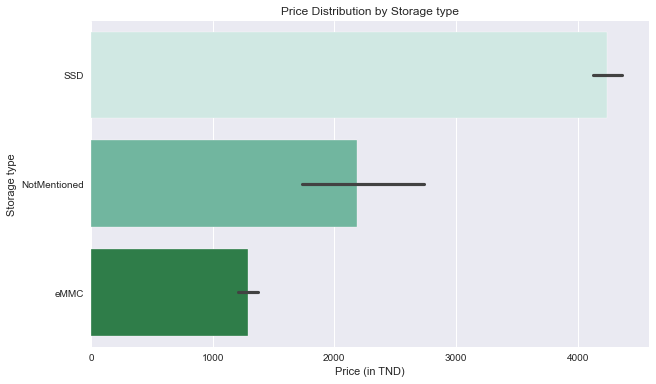

In [156]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='Storage type', data=laptop, palette='BuGn')

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Storage type')
plt.title('Price Distribution by Storage type')

# Show the plot
plt.show()

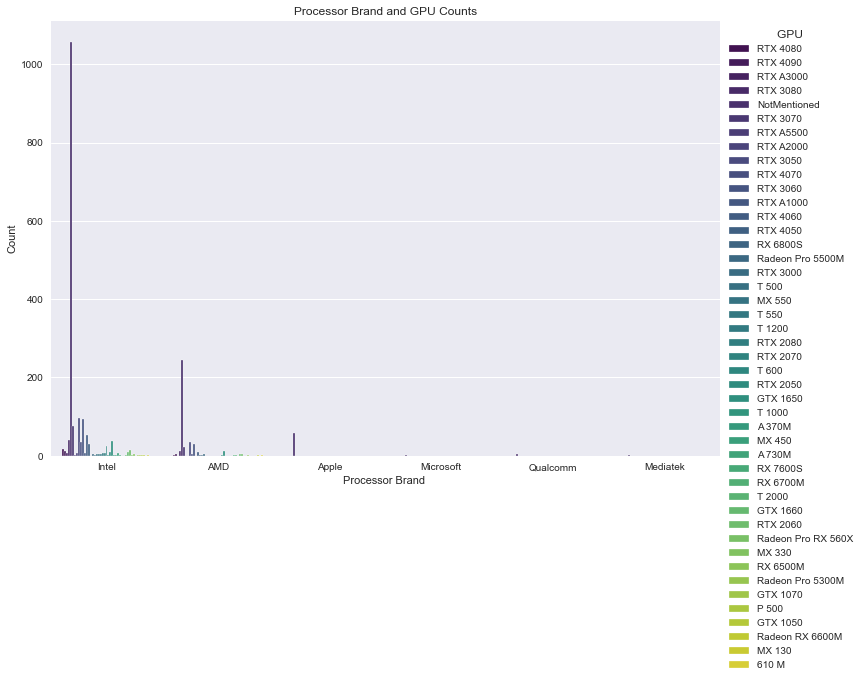

In [157]:
plt.figure(figsize=(12, 8))
sns.countplot(x='CPU Brand ', hue='GPU', data=laptop, palette='viridis')
plt.title('Processor Brand and GPU Counts')
plt.xlabel('Processor Brand ')
plt.ylabel('Count')
plt.legend(title='GPU ', bbox_to_anchor=(1, 1))
plt.show()

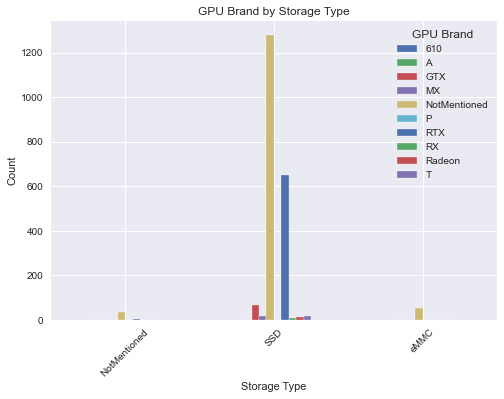

In [158]:
gpu_storage_counts = laptop.groupby(['Storage type', 'GPU Brand']).size().unstack(fill_value=0)
gpu_storage_counts.plot(kind='bar')
plt.xlabel('Storage Type')
plt.ylabel('Count')
plt.title('GPU Brand by Storage Type')
plt.xticks(rotation=45)
plt.legend(title='GPU Brand')
plt.show()

The scatter plot shows the relationship between the price of laptops and their brands, with the variation OF The "Touch Screen"  represented by different colors.
Each point on the plot represents a laptop, with its price on the x-axis and the brand on the y-axis.
The color of each point indicates the Status of the laptop.

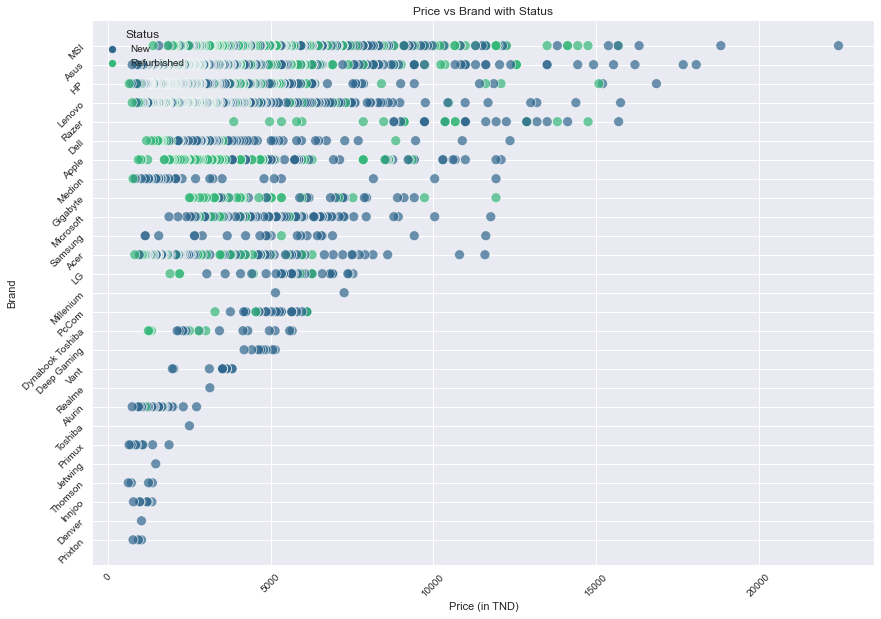

In [159]:
# Set the style to a custom style
plt.style.use('seaborn')
plt.figure(figsize=(14, 10))
# Create a scatter plot with Seaborn
sns.scatterplot(x='Price_in_TND', y='Brand', hue='Status', data=laptop, palette='viridis', s=100, alpha=0.7)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price vs Brand with Status')

# Add a legend with title
plt.legend(title='Status', loc='upper left')

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

The scatter plot shows the relationship between the price of laptops and their brands, with the variation in "Touch Screen" variable represented by different colors.
Each point on the plot represents a laptop, with its price on the x-axis and the brand on the y-axis.
The color of each point indicates if the laptop have a a touch screen" or not .

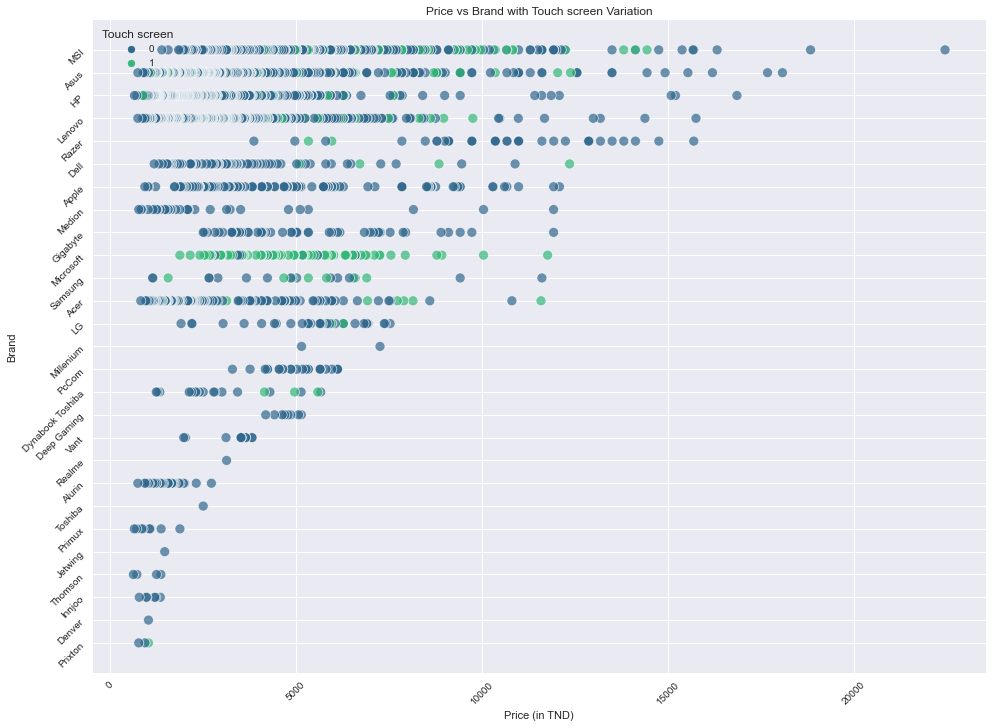

In [160]:
# Set the style to a custom style
plt.style.use('seaborn')
plt.figure(figsize=(16, 12))
# Create a scatter plot with Seaborn
sns.scatterplot(x='Price_in_TND', y='Brand', hue='Touch screen', data=laptop, palette='viridis', s=100, alpha=0.7)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price vs Brand with Touch screen Variation')

# Add a legend with title
plt.legend(title='Touch screen', loc='upper left')

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

The scatter plot shows the relationship between the price of laptops and their CPU brands, with the variation OF The "Processor tier" represented by different colors.
Each point on the plot represents a laptop, with its price on the x-axis and the brand on the y-axis.
The color of each point indicates the Processor tier of the laptop.

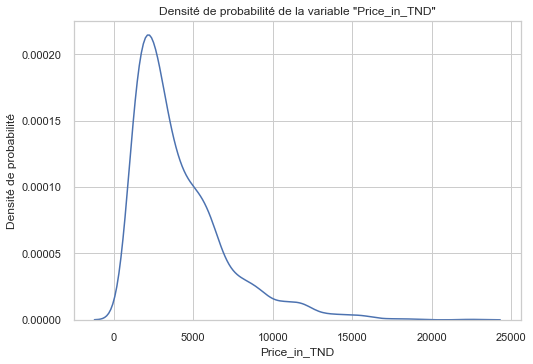

In [70]:
# Densité de probabilité de la variable Price_in_TND

sns.kdeplot(data=laptop, x='Price_in_TND')
plt.xlabel('Price_in_TND')
plt.ylabel('Densité de probabilité')
plt.title('Densité de probabilité de la variable "Price_in_TND"')
plt.show()

C:\Users\farah math\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


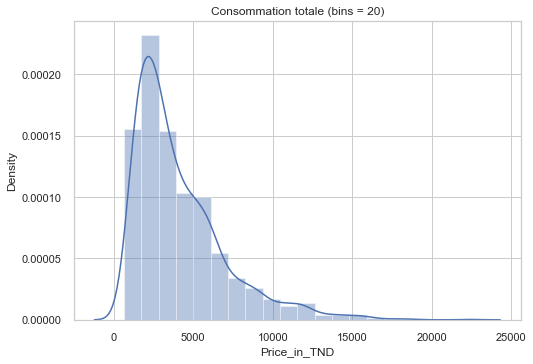

In [72]:
# Histogramme du montant total de la consommation

sns.distplot(
    laptop["Price_in_TND"], 
    kde = True, 
    bins = 20).set_title("Consommation totale (bins = 20)");

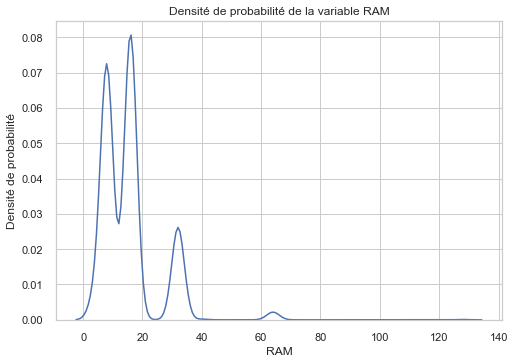

In [69]:
# Densité de probabilité de la variable 'BMXWT'

sns.kdeplot(data=laptop, x='RAM')
plt.xlabel('RAM')
plt.ylabel('Densité de probabilité')
plt.title('Densité de probabilité de la variable RAM')
plt.show()

C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


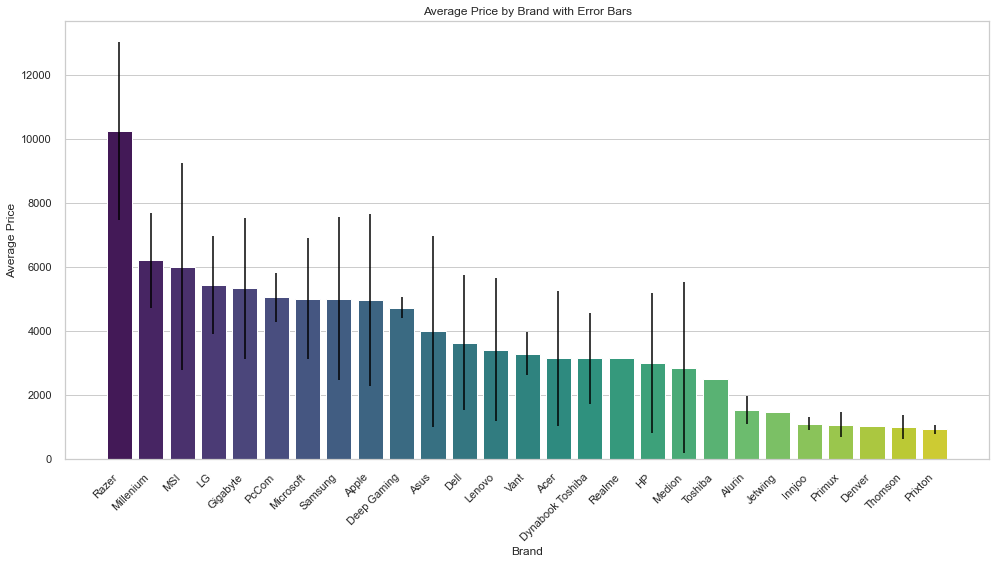

In [162]:
sns.set(style="whitegrid")
brand_stats = laptop.groupby('Brand')['Price_in_TND'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
sns.color_palette('viridis', n_colors=len(brand_stats))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=brand_stats.index, y='mean', data=brand_stats, palette='viridis')
ax.errorbar(x=brand_stats.index, y=brand_stats['mean'], yerr=brand_stats['std'], fmt='none', color='black', capsize=5)
plt.title('Average Price by Brand with Error Bars')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


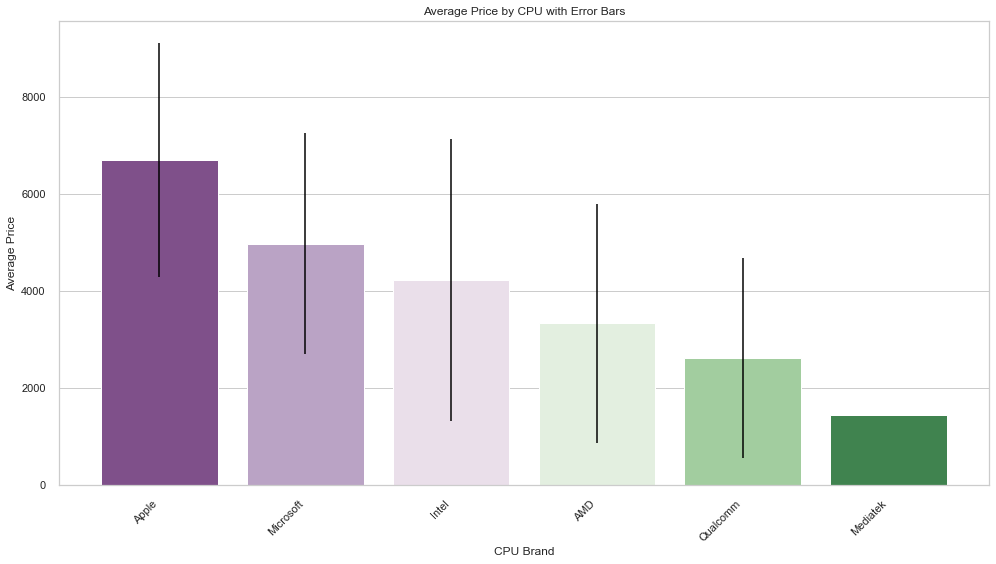

In [163]:
sns.set(style="whitegrid")
brand_stats = laptop.groupby('CPU Brand ')['Price_in_TND'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
sns.color_palette('viridis', n_colors=len(brand_stats))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=brand_stats.index, y='mean', data=brand_stats, palette='PRGn')
ax.errorbar(x=brand_stats.index, y=brand_stats['mean'], yerr=brand_stats['std'], fmt='none', color='black', capsize=5)
plt.title('Average Price by CPU with Error Bars')
plt.xlabel('CPU Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

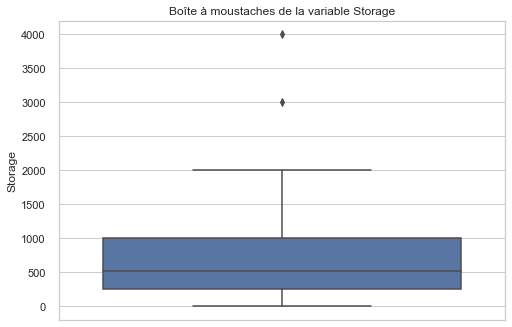

In [92]:
# Boîte à moustache d la variable 'BMXHT'

sns.boxplot(data=laptop, y='Storage')
plt.ylabel('Storage')
plt.title('Boîte à moustaches de la variable Storage')
plt.show()

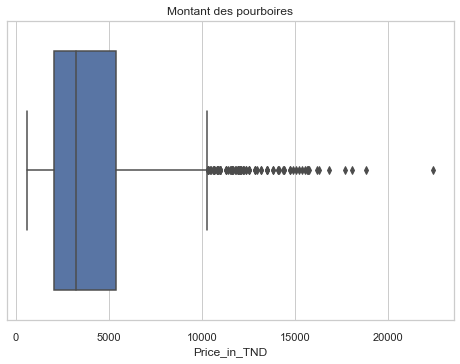

In [73]:
# Visualisation verticale de la boîte à moustache du montant des pourboires

sns.boxplot(x= laptop["Price_in_TND"]).set_title("Montant des pourboires");

# creating a line plot for each numerical column
generating a series of line plots, each showing the relationship between one of the numerical columns in the DataFrame laptop and the 'Price_in_TND' column. These plots help visualize how each numerical feature correlates with the price of laptops.

C:\Users\farah math\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\farah math\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


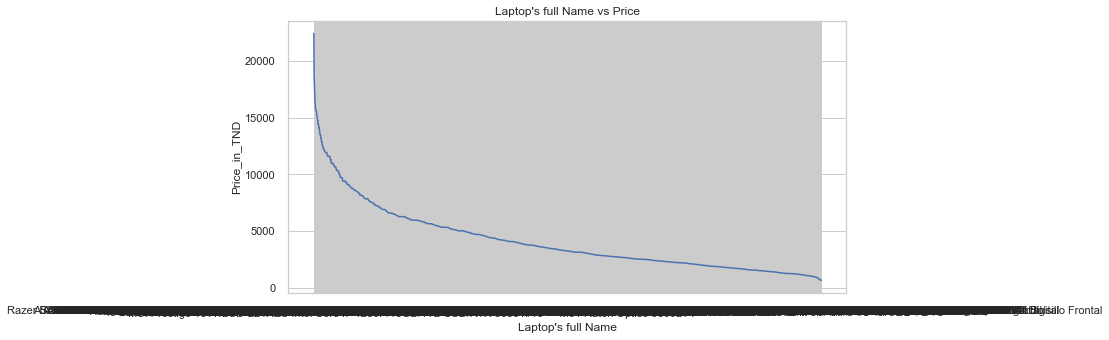

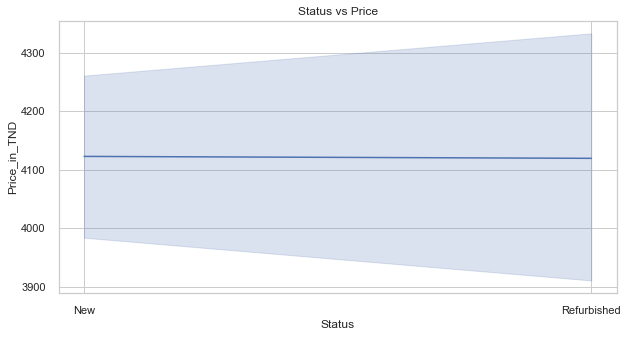

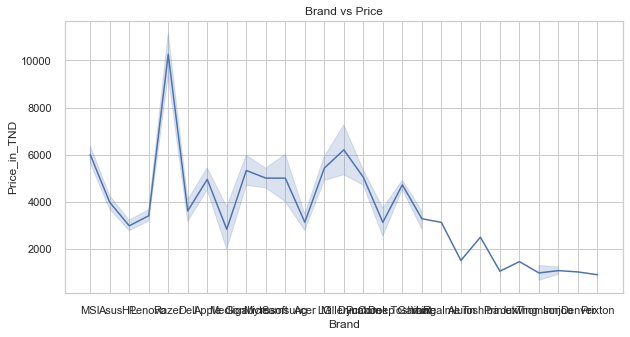

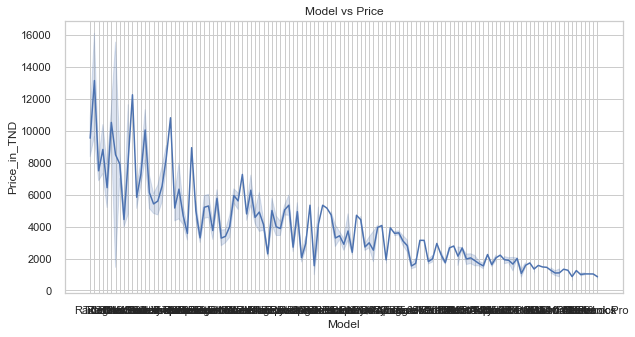

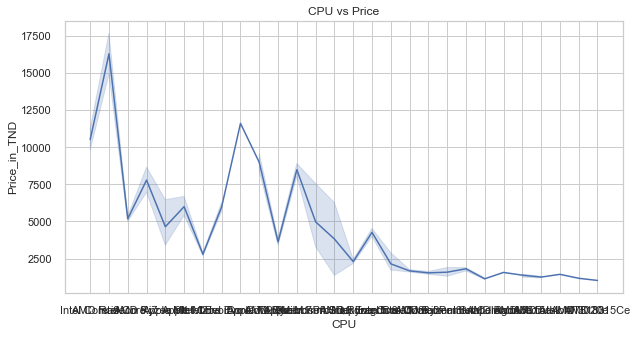

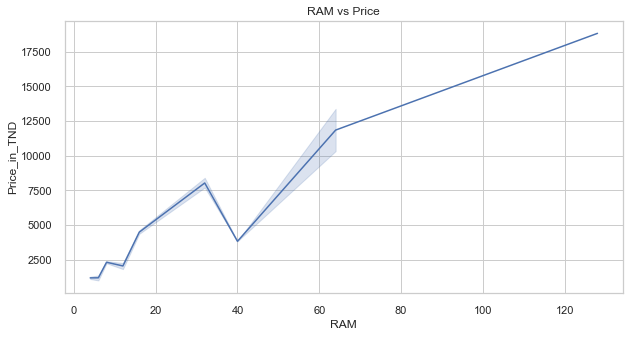

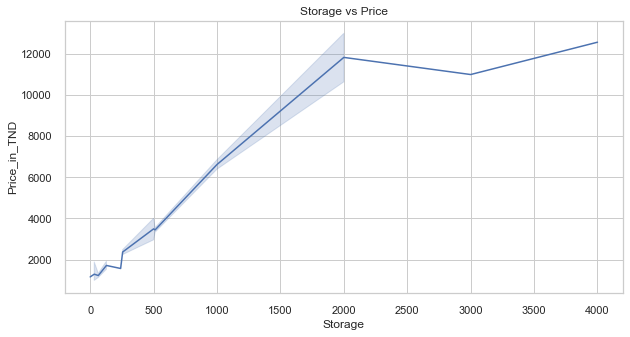

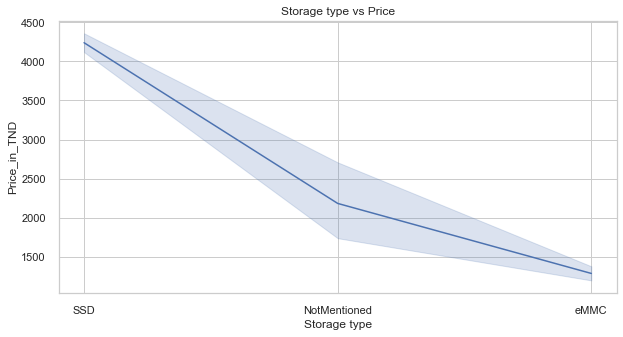

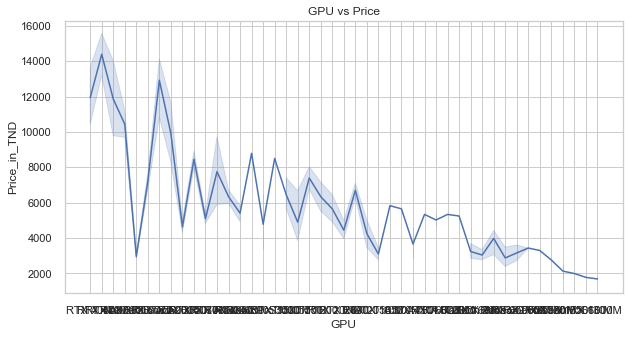

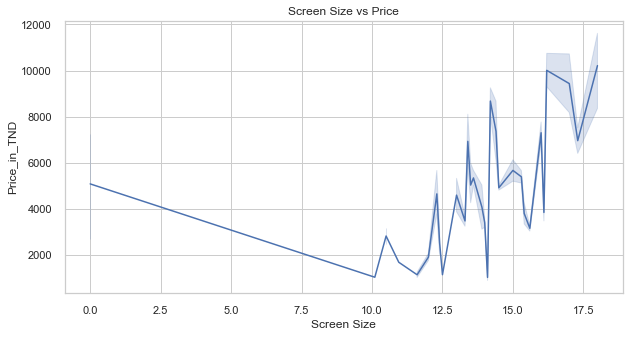

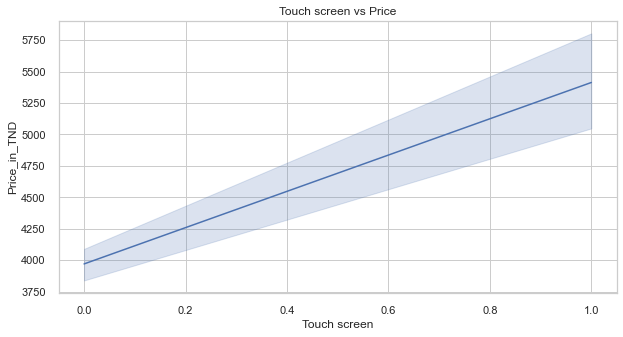

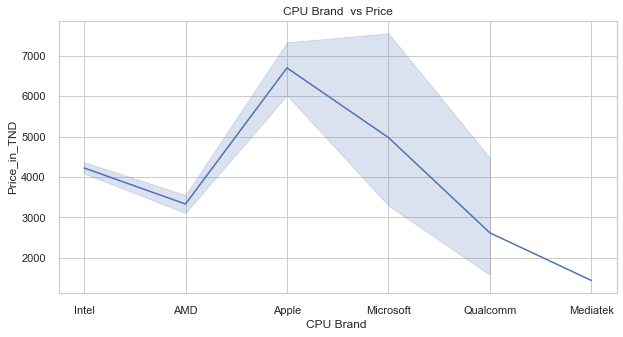

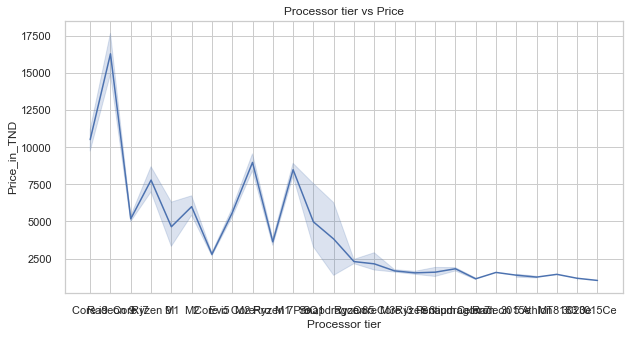

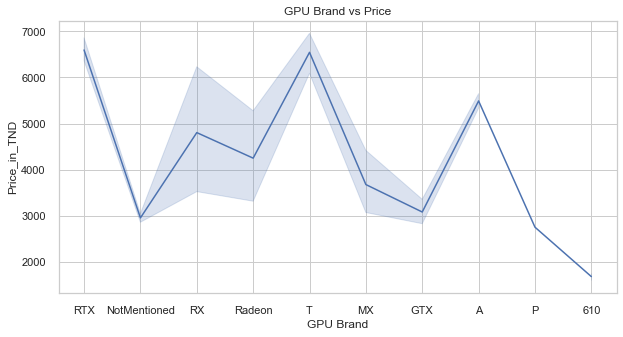

In [93]:
for col in laptop.columns:
    if 'Price' not in col and col != 'Price_in_TND':
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(f'{col} vs Price')
        sns.lineplot(data=laptop, x=col, y=laptop['Price_in_TND'])


# the 10 most Expensive based on some laptops Features 

[Text(0.5, 0, 'GPU'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Brands')]

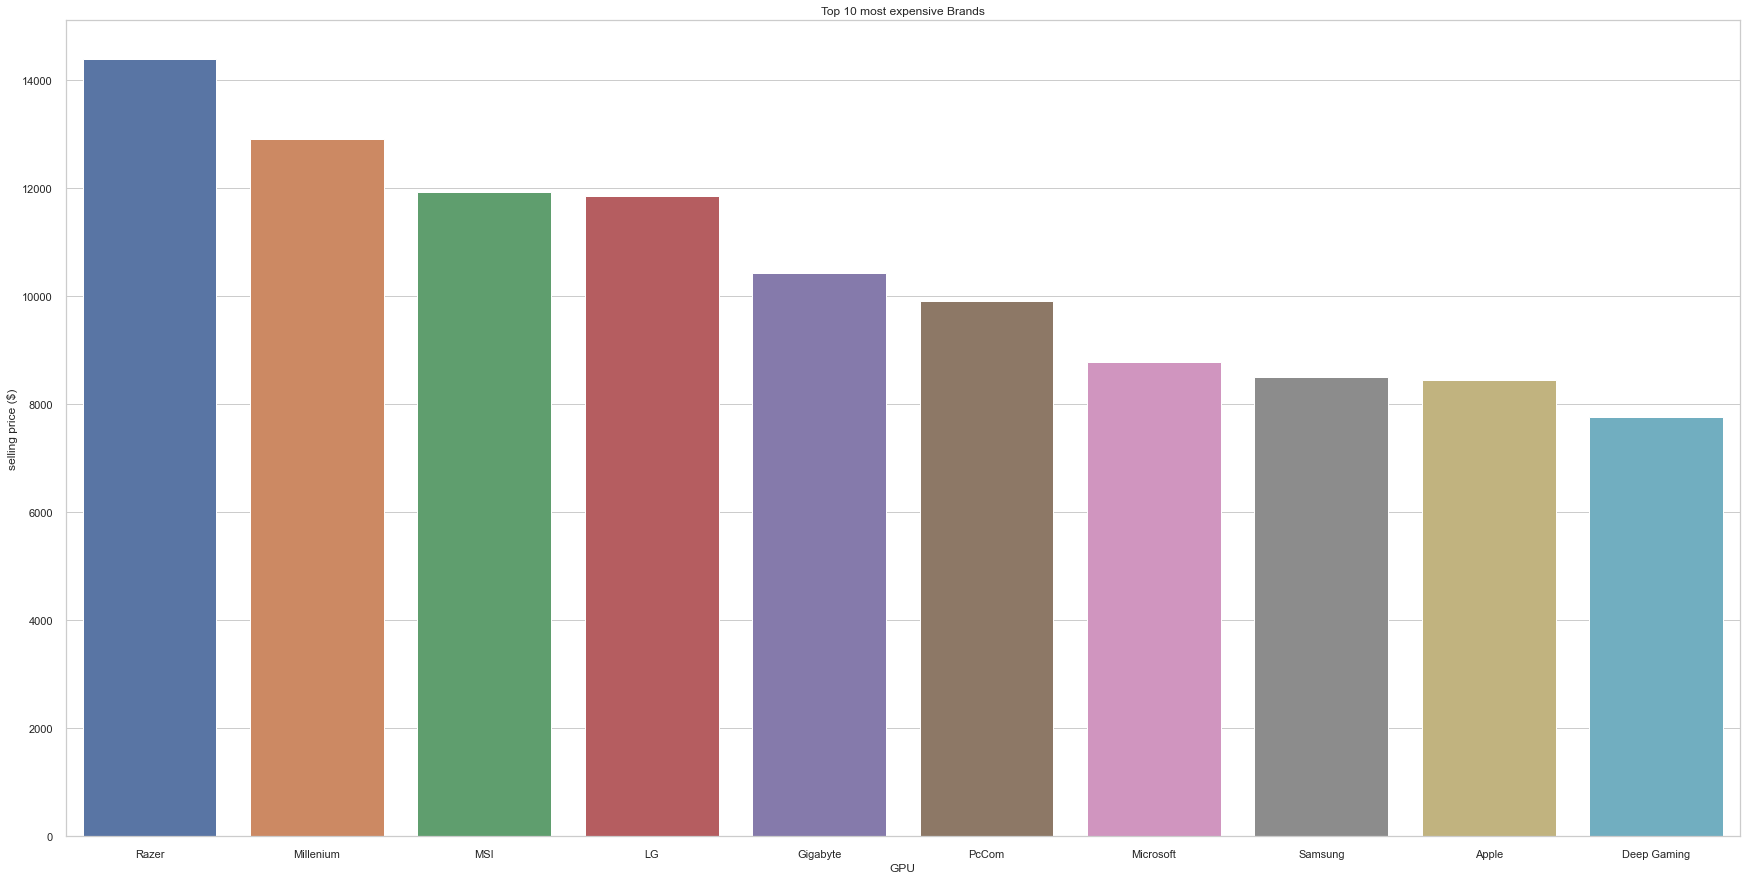

In [76]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=laptop.groupby('Brand').mean()['Price_in_TND'].sort_values(ascending=False)[:10].index, y=laptop.groupby('GPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='GPU', ylabel='selling price ($)', title='Top 10 most expensive Brands')

[Text(0.5, 0, 'Model'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Laptop Models')]

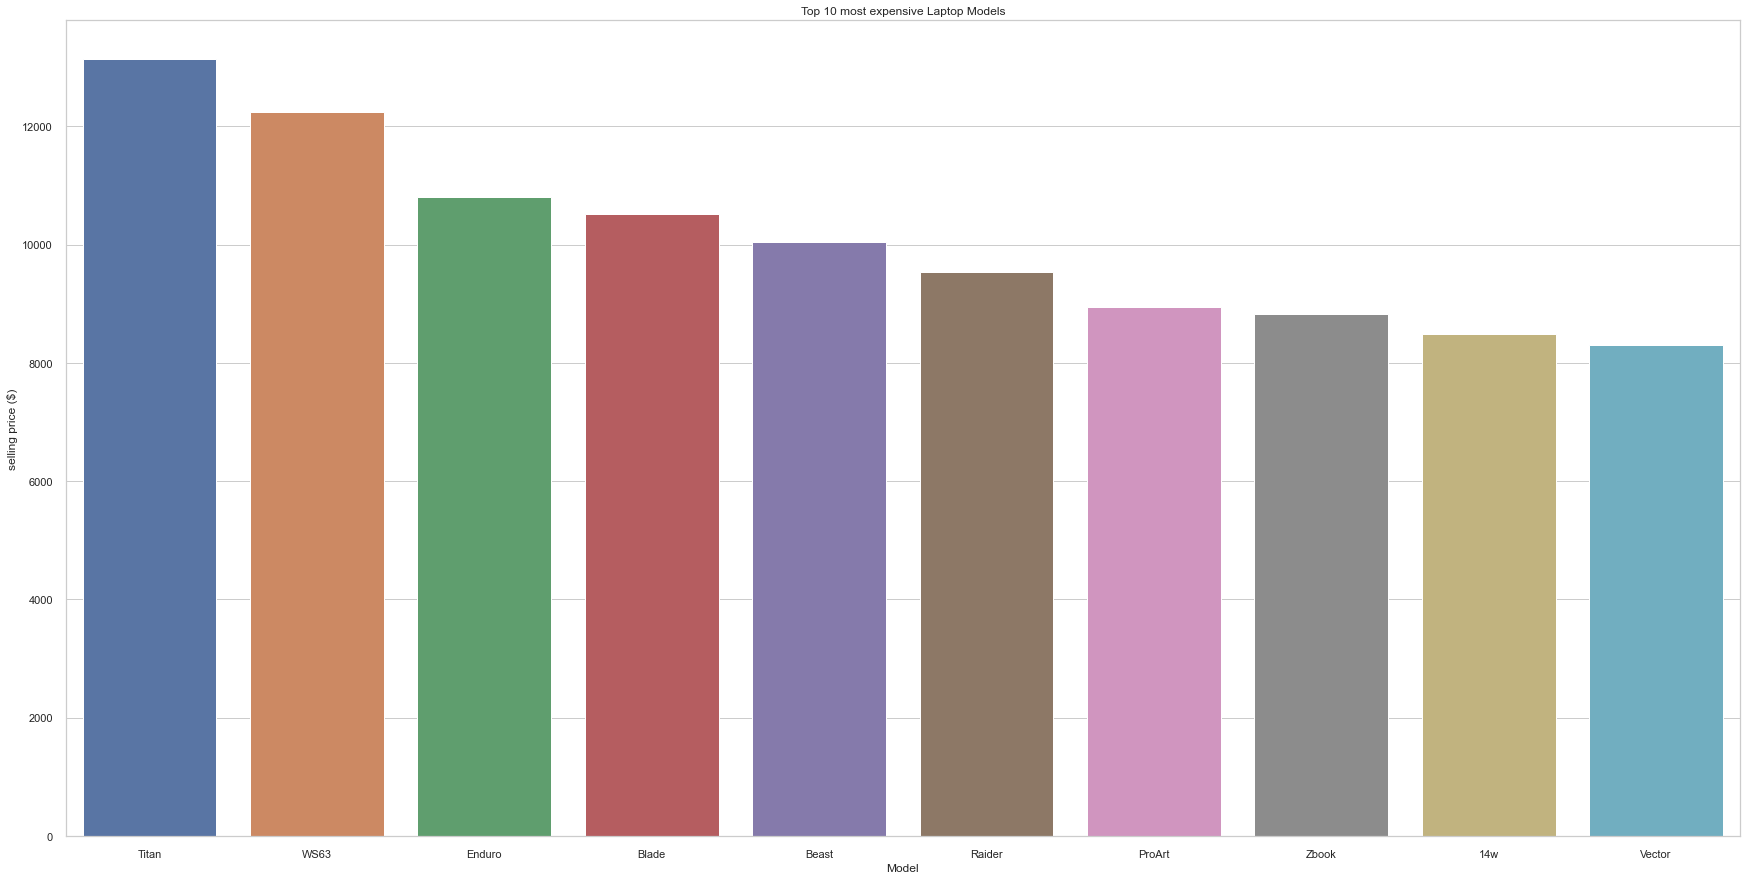

In [77]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=laptop.groupby('Model').mean()['Price_in_TND'].sort_values(ascending=False)[:10].index, y=laptop.groupby('Model').mean()['Price_in_TND'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Model', ylabel='selling price ($)', title='Top 10 most expensive Laptop Models')

[Text(0.5, 0, 'CPU'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Laptop CPUs')]

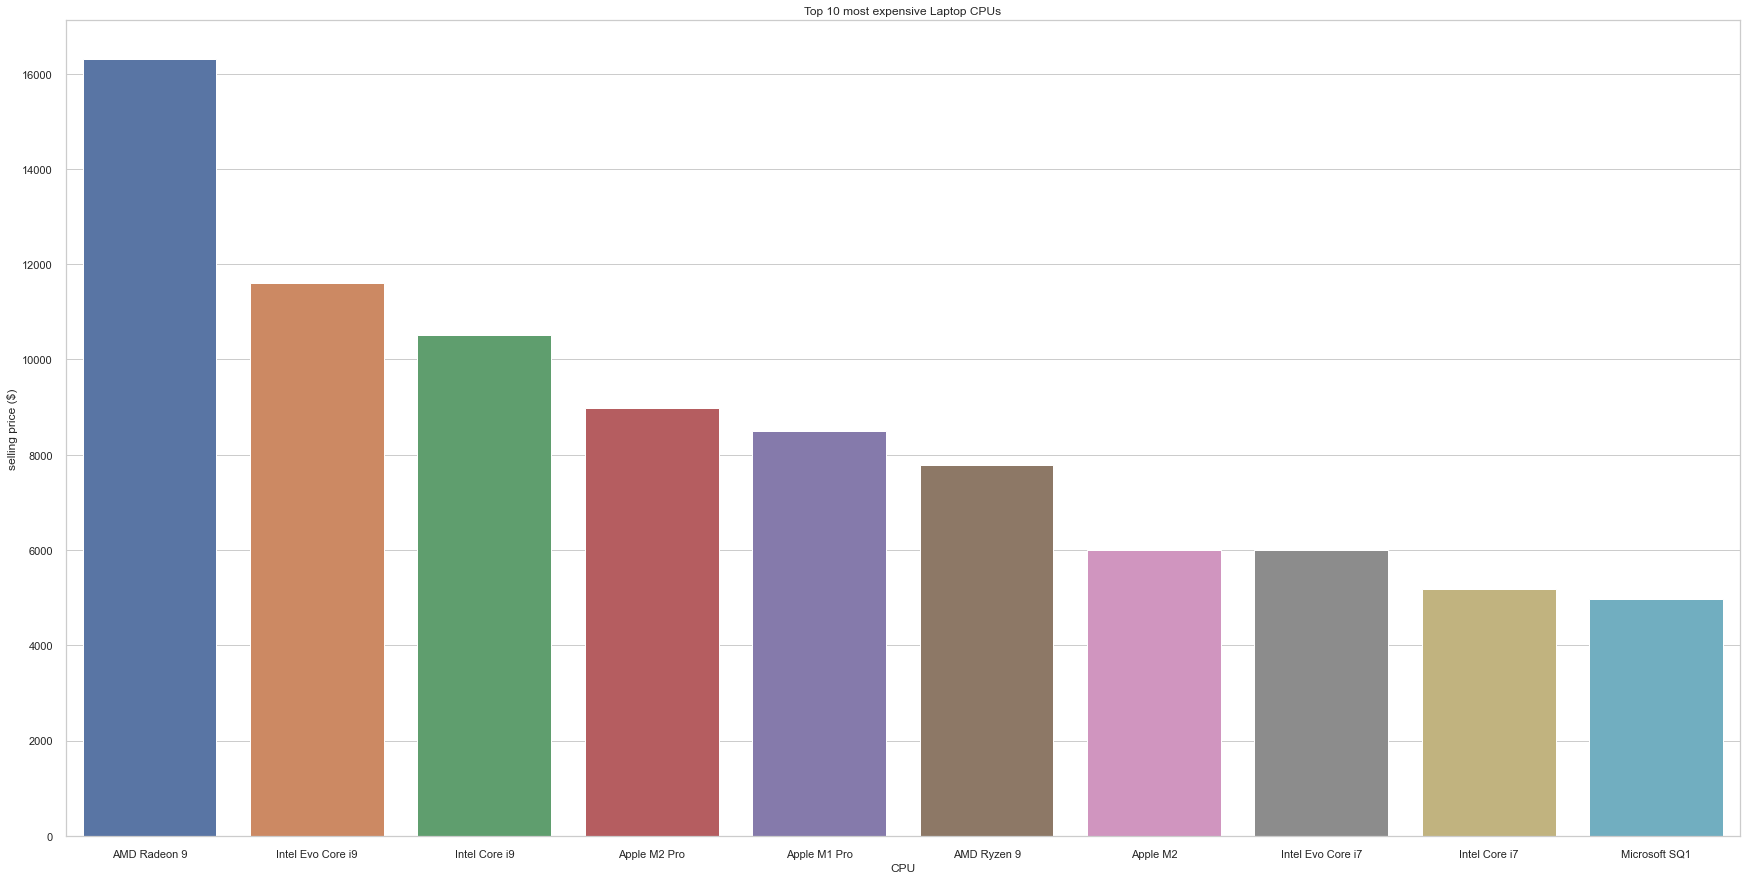

In [78]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=laptop.groupby('CPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].index, y=laptop.groupby('CPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='CPU', ylabel='selling price ($)', title='Top 10 most expensive Laptop CPUs')

[Text(0.5, 0, 'GPU'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive GPUs')]

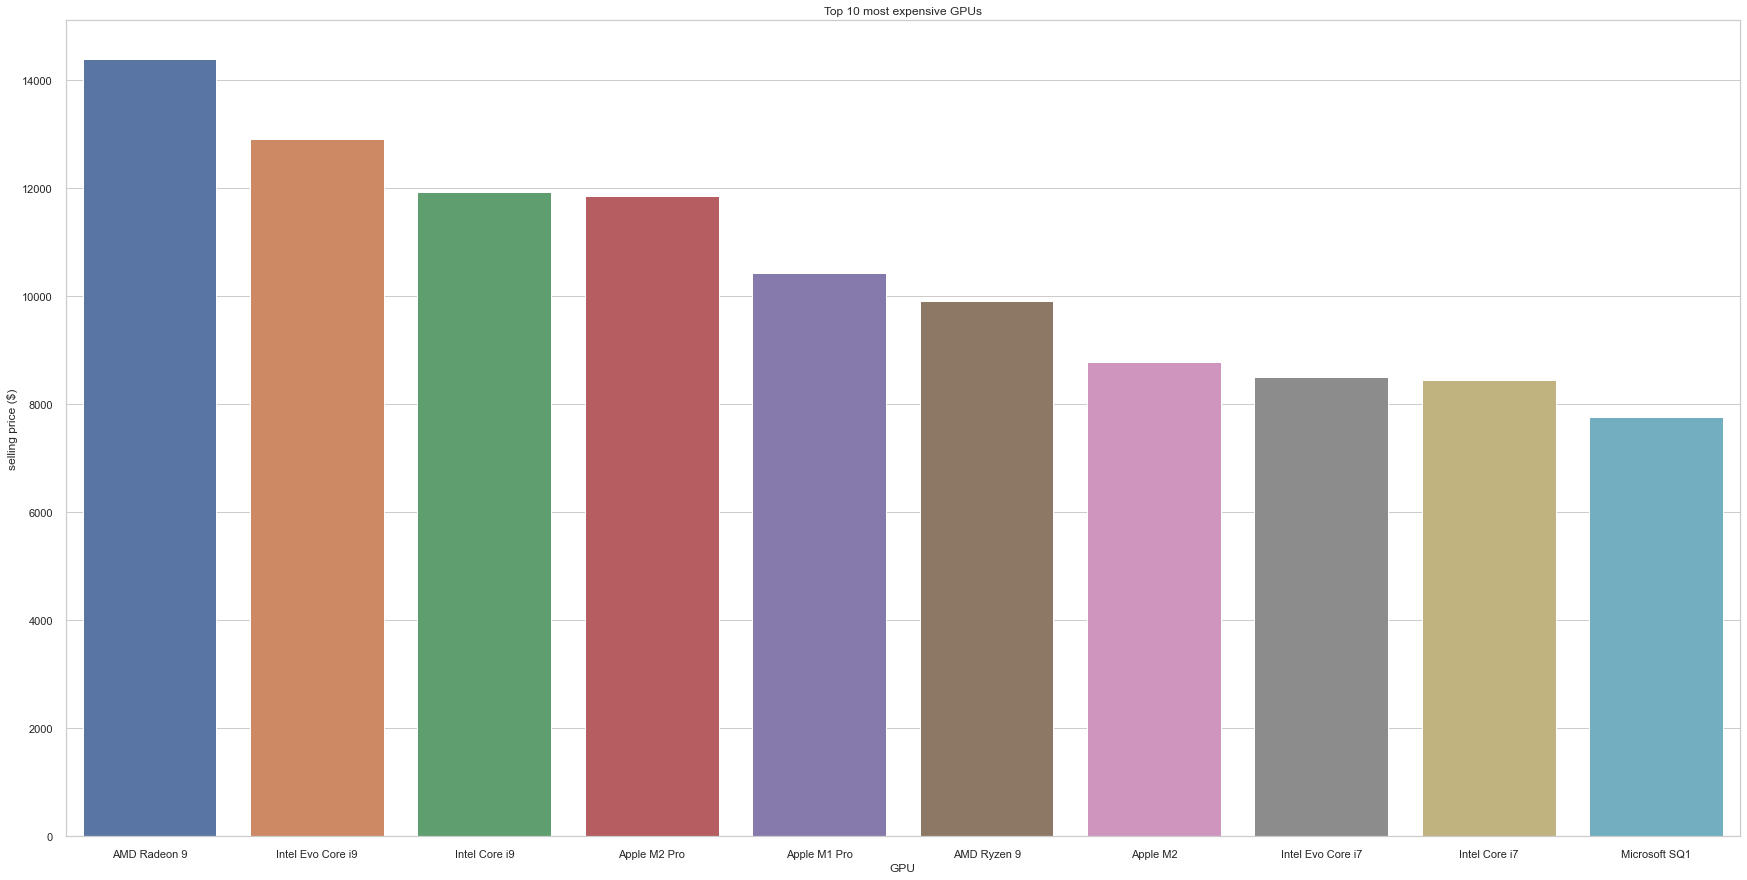

In [79]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=laptop.groupby('CPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].index, y=laptop.groupby('GPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='GPU', ylabel='selling price ($)', title='Top 10 most expensive GPUs')

[Text(0.5, 0, 'RAM'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive Storage')]

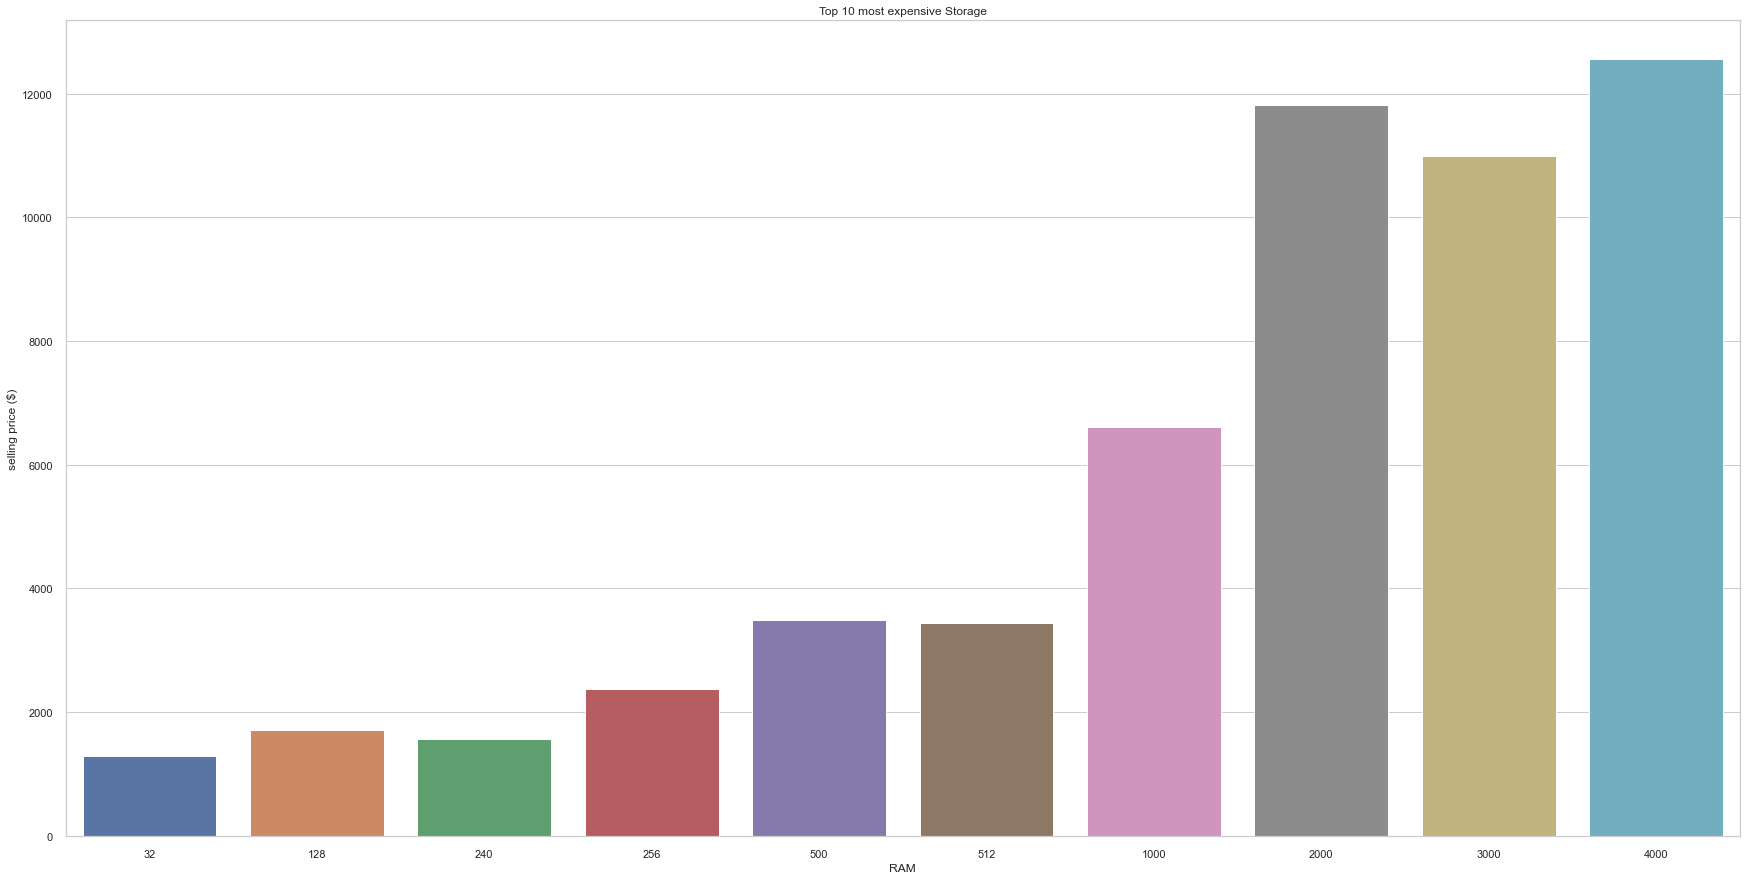

In [80]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=laptop.groupby('Storage').mean()['Price_in_TND'].sort_values(ascending=False)[:10].index, y=laptop.groupby('Storage').mean()['Price_in_TND'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='RAM', ylabel='selling price ($)', title='Top 10 most expensive Storage')

[Text(0.5, 0, 'GPU'),
 Text(0, 0.5, 'selling price ($)'),
 Text(0.5, 1.0, 'Top 10 most expensive GPUs')]

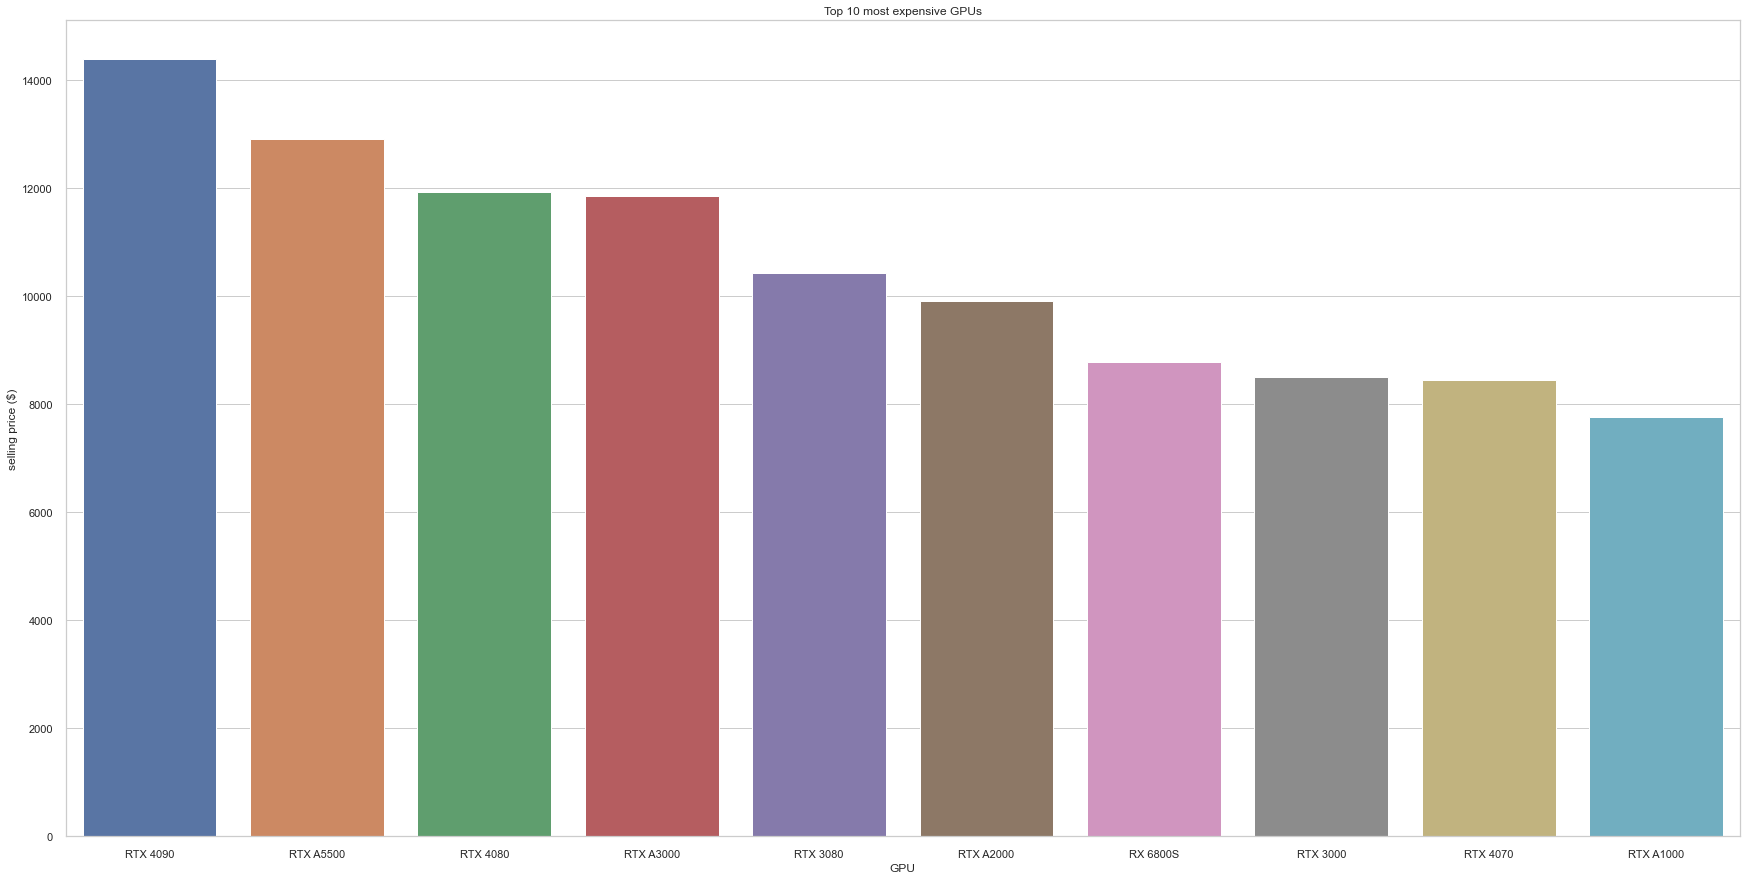

In [81]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.barplot(x=laptop.groupby('GPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].index, y=laptop.groupby('GPU').mean()['Price_in_TND'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='GPU', ylabel='selling price ($)', title='Top 10 most expensive GPUs')

# Set the style to a custom style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16, 12))

# Create a scatter plot with Seaborn
sns.scatterplot(x='Price_in_TND', y='CPU Brand ', hue='Processor tier', data=laptop, palette='viridis', s=100, alpha=0.7)
# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price vs CPU Brand with Processor tier Variation')

# Add a legend with title
plt.legend(title='CPU', loc='upper left')

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

# Machine Learning : 

In [82]:
laptop.columns

Index(['Laptop's full Name', 'Status', 'Brand', 'Model', 'CPU', 'RAM',
       'Storage', 'Storage type', 'GPU', 'Screen Size', 'Touch screen',
       'Price', 'CPU Brand ', 'Processor tier', 'GPU Brand', 'Price_in_TND'],
      dtype='object')

In [83]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 1099 to 668
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2160 non-null   object 
 8   GPU                 2160 non-null   object 
 9   Screen Size         2160 non-null   float64
 10  Touch screen        2160 non-null   int64  
 11  Price               2160 non-null   float64
 12  CPU Brand           2160 non-null   object 
 13  Processor tier      2160 non-null   object 
 14  GPU Brand           2160 non-null   object 
 15  Price_in_TND        2160 non-null   float64
dtypes: f

<AxesSubplot:xlabel='Brand', ylabel='count'>

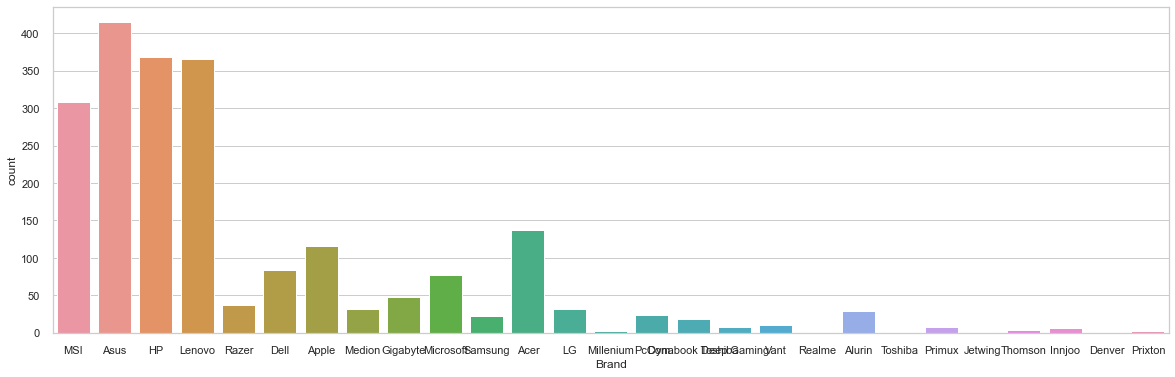

In [84]:
laptop['Brand'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Brand", data=laptop, ax=ax)

In [85]:
import numpy as np

# Handle missing values (fill with mean or median)
laptop.fillna(laptop.mean(), inplace=True)

# Replace infinite values with NaN or another appropriate value
laptop.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
laptop.dropna(inplace=True)

# Identify numeric columns
numeric_cols = laptop.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with mean for numeric columns
laptop[numeric_cols] = laptop[numeric_cols].fillna(laptop[numeric_cols].mean())


C:\Users\farah math\AppData\Local\Temp\ipykernel_20660\2211462482.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  laptop.fillna(laptop.mean(), inplace=True)


In [86]:
X = laptop.drop('Price_in_TND', axis=1) 
#target Selection :
y = laptop['Price_in_TND']

In [87]:
X.describe()

,RAM,Storage,Screen Size,Touch screen,Price
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,15.413889,596.294444,15.140023,0.105093,1312.638509
std,9.867815,361.220506,1.367766,0.306744,911.475417
min,4.000000,0.000000,0.000000,0.000000,201.050000
25%,8.000000,256.000000,14.000000,0.000000,661.082500
50%,16.000000,512.000000,15.600000,0.000000,1031.945000
75%,16.000000,1000.000000,15.600000,0.000000,1708.970000
max,128.000000,4000.000000,18.000000,1.000000,7150.470000


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical variables
categorical_cols = ['Brand', 'CPU Brand ', 'Model', 'Processor tier']

# Instantiate OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Fit and transform the categorical variables
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_cols)

# Convert encoded data to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

C:\Users\farah math\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [90]:
# Extract numerical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64','float32']).columns

# Concatenate encoded variables with remaining numerical features
X_train_processed = pd.concat([X_train.loc[:, numeric_cols], X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test.loc[:, numeric_cols], X_test_encoded_df], axis=1)


In [91]:
# Instantiate model
model = DecisionTreeRegressor()

# Train model
model.fit(X_train_processed, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# Make predictions
y_pred = model.predict(X_test_processed)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Evaluate model
accuracy = model.score(X_test_processed, y_test)
print("Accuracy:", accuracy)

#defining the model : decision tree
laptop_model = DecisionTreeRegressor(random_state=1)
#fitting the model
laptop_model.fit(X,y)
print("Making predictions for the following 5 laptops:")
print(X.head())
print("The predictions are")
laptop_model.predict(X.head())

#choosing features
laptop_features = ["CPU Brand1","Brand_Code","GPU_Brand_Code", "RAM","Storage","Screen Size","Model1"]


This code performs the following steps:

Creates an instance of SGDRegressor.
Fits the model to the training data.
Makes predictions on the training data.
Calculates the root mean squared error (RMSE) of the predictions.
Defines the parameter grid for the grid search.
Performs grid search using GridSearchCV to find the best parameters.
Prints the best score and best parameters found during the grid search.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Create an instance of SGDRegressor
sgd_reg = SGDRegressor()

# Fit the model
sgd_reg.fit(X_train, y_train)


# Make predictions
pred = sgd_reg.predict(X_train)

# Calculate RMSE
sgd_mse = mean_squared_error(y_train, pred)
sgd_rmse = np.sqrt(sgd_mse)

# Print RMSE
print("RMSE:", sgd_rmse)

# Define the parameter grid
param_grid = {
    'alpha': [10.0 ** -i for i in range(1, 7)],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter': [1000, 5000, 10000]
}

# Perform grid search
grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best score and best parameters
print("Best score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Kreg = KNeighborsRegressor()
Kreg.fit(X_train, y_train)

laptop["CPU Brand1"] = laptop["CPU Brand "].replace({'AMD': 1, 'Apple': 2, 'Intel': 3, 'Mediatek': 4, 'Microsoft': 5, 'Qualcomm': 6})
laptop.head()

pred = Kreg.predict(X_train)
k_mse = mean_squared_error(y_train, pred)
k_rmse = np.sqrt(k_mse)
k_rmse

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, final_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

brand_mapping = {
    'Asus': 1,
    'HP': 2,
    'Lenovo': 3,
    'MSI': 4,
    'Acer': 5,
    'Apple': 6,
    'Dell': 7,
    'Microsoft': 8,
    'Gigabyte': 9,
    'Razer': 10,
    'Medion': 11,
    'LG': 12,
    'Alurin': 13,
    'PcCom': 14,
    'Samsung': 15,
    'Dynabook Toshiba': 16,
    'Vant': 17,
    'Primux': 18,
    'Deep Gaming': 19,
    'Innjoo': 20,
    'Thomson': 21,
    'Prixton': 22,
    'Millenium': 23,
    'Denver': 24,
    'Jetwing': 25,
    'Realme': 26,
    'Toshiba': 27
}

# Map the brands to numeric values in a new column
laptop['Brand_Code'] = laptop['Brand'].map(brand_mapping)

# Display the DataFrame with the new column
laptop.head()

In [ ]:
filename="C:\DM Project\lap2"
laptop.to_csv(filename, index=False, encoding='utf-8')

laptop["Brand1"] = laptop["Brand"].replace({'': 1, 'Apple': 2, 'Intel': 3, 'Mediatek': 4, 'Microsoft': 5, 'Qualcomm': 6})
laptop.head()

# Define the mapping dictionary for GPU brands
gpu_mapping = {
    'NotMentioned':0,
    'RTX':1,
    'GTX': 2,
    'T': 3,
    'MX': 4,
    'Radeon': 5,
    '610': 6,
    'A': 7,
    'P': 8,
    'RX': 9
}

# Map the GPU brands to numeric values in a new column
laptop['GPU_Brand_Code'] = laptop['GPU Brand'].map(gpu_mapping)

# Display the DataFrame with the new column
laptop.head()